<a href="https://colab.research.google.com/github/chenshuo/notes/blob/master/notebooks/DSP_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Lab0: Signal generation



## Sinusoid



* Forward Euler

* Backward Euler

* [Leapfrog](https://en.wikipedia.org/wiki/Leapfrog_integration)

# Lab1: Convolution

## Moving average

In [ ]:
dlti = scipy.signal.dlti([1/2, 1/2], [1])
zeros = dlti.zeros
print('Zeros:', zeros)
print('Poles:', dlti.poles)

Zeros: [-1.]
Poles: []


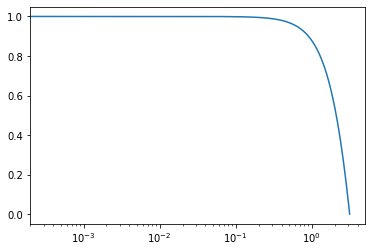

In [ ]:
w, mag = dlti.freqresp()
plt.semilogx(w, np.abs(mag))

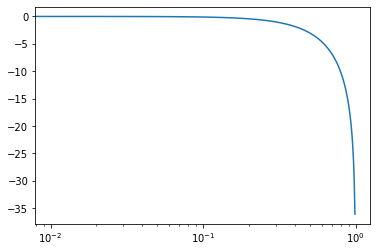

In [ ]:
w, mag, phase = dlti.bode()
plt.semilogx(w/np.pi, mag)

In [ ]:
@interact(w = (0.5, 50, 0.5))
def resp(w = 1):
  t=np.linspace(0, 1, 101)
  x = np.cos(t*2*w*np.pi)
  plt.plot(t, x)
  y = np.convolve(x, [1/2, 1/2])
  plt.plot(t, y[0:len(x)])
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=50.0, min=0.5, step=0.5), Output()), _dom_cl…

### n=3

[ 0.66666667 -0.66666667]


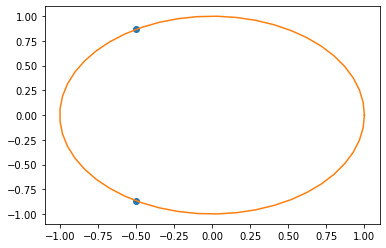

In [ ]:
dlti3 = scipy.signal.dlti([1/3, 1/3, 1/3], [1])
plt.plot(np.real(dlti3.zeros), np.imag(dlti3.zeros), 'o')
print(np.angle(dlti3.zeros)/np.pi)
w = np.linspace(0, 2*np.pi)
plt.plot(np.cos(w), np.sin(w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


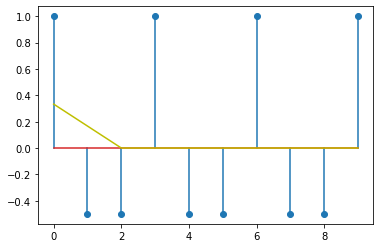

In [ ]:
t = np.linspace(0, 1, 1001)
x = np.cos(t * 1000* 2/3 * np.pi)  # sin
y = np.convolve(x, [1/3,1/3,1/3])
plt.stem(x[0:10])
plt.plot(y[0:10], 'y')

### n=4

[-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]


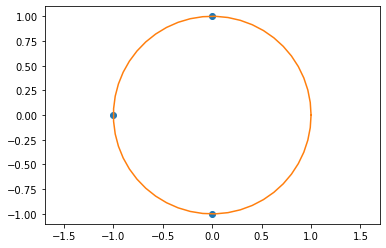

In [ ]:
dlti3 = scipy.signal.dlti([1/4, 1/4, 1/4, 1/4], [1])
plt.plot(np.real(dlti3.zeros), np.imag(dlti3.zeros), 'o')
print(dlti3.zeros)
w = np.linspace(0, 2*np.pi)
plt.plot(np.cos(w), np.sin(w))
limits = plt.axis("equal")

## -1, 1

In [ ]:
dlti = scipy.signal.dlti([-1/2, 1/2], [1])
zeros = dlti.zeros
print('Zeros:', zeros)
print('Poles:', dlti.poles)

Zeros: [1.]
Poles: []


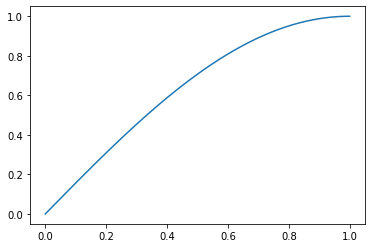

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w/np.pi, np.abs(mag))

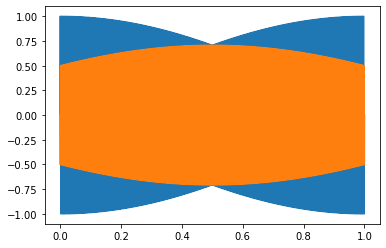

In [ ]:
t=np.linspace(0, 1, 1000)
x=np.sin(t*500*np.pi)
y = np.convolve(x, [-1/2, 1/2])
plt.plot(t, x, t, y[0:len(x)])

## OpenAirIR

# Lab2: Frequency Analysis

## DTMF


|        | 1209 Hz | 1336 Hz | 1447 Hz |
| -----: | :-----: | :-----: | :-----: |
| 697 Hz |  **1**  |  **2**  |  **3**  |
| 770 Hz |  **4**  |  **5**  |  **6**  |
| 852 Hz |  **7**  |  **8**  |  **9**  |
| 941 Hz |  **$*$** |  **0**  |  **#**  |


In [ ]:
freqs = np.array([697, 770, 852, 941, 1209, 1336, 1447])
np.diff(freqs)


array([ 73,  82,  89, 268, 127, 111])

freqs * 1.035

In [ ]:
@interact(nfft = (60, 250, 5))
def how_many_bins(nfft=105):
  sr = 8000
  t = np.arange(nfft)/sr
  x = np.sin(2*np.pi* freqs.reshape(len(freqs), 1) * t)
  print('%.2f' % (sr / nfft))
  for i in x:
    fft = np.fft.rfft(i)
    plt.plot(np.abs(fft[0:(nfft//4)])/nfft)


interactive(children=(IntSlider(value=105, description='nfft', max=250, min=60, step=5), Output()), _dom_class…

### Goertzel algorithm
https://en.wikipedia.org/wiki/Goertzel_algorithm

In [ ]:
N = 205
sr = 8000
print('%.2f Hz' % (sr / N))

k = np.array([18, 20, 22, 24, 31, 34, 37])
k * sr / N - freqs 

39.02 Hz


array([ 5.43902439, 10.48780488,  6.53658537, -4.41463415,  0.75609756,
       -9.17073171, -3.09756098])

In [ ]:
N = 205
sr = 8000
t = np.arange(N) / sr
x = np.cos(t * 2 * np.pi * 697)

bin = 18
fft = np.fft.rfft(x)
print('fft:', fft[bin])

wk = np.exp(1j * bin * 2 * np.pi * np.arange(N) / N)
dft = np.vdot(wk, x)
print('dft:', dft)
print('diff:', dft - fft[bin])



fft: (89.75850817734614-42.23143015507722j)
dft: (89.75850817734626-42.231430155077035j)
diff: (1.1368683772161603e-13+1.8474111129762605e-13j)


In [ ]:
s2 = 0
s1 = 0
s0 = 0
w = bin * 2 * np.pi / N
c = np.cos(w)
c2 = 2 * c
# print(c)
for p in x:
  s0 = p + c2 * s1 - s2
  s2 = s1
  s1 = s0
# s0 = c * s1
#print(s2)
goert = s2-np.exp(-1j*w) * s1

print(dft) 
print(goert)
print(np.real(dft) + np.real(goert), (np.imag(dft) - np.imag(goert)))

power = s1 * s1 + s2 * s2 - c2 * s1 * s2

print(power)
print(np.real_if_close(dft * dft.conj()))

(89.75850817734626-42.231430155077035j)
(-89.75850817734629-42.231430155076346j)
-2.842170943040401e-14 -6.892264536872972e-13
9840.083483165832
9840.083483165885


### Real world requirements

https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling



https://web.archive.org/web/20110925184759/http://nemesis.lonestar.org/reference/telecom/signaling/dtmf.html

The frequencies used were chosen to prevent any harmonics from being incorrectly detected by the receiver as some other DTMF frequency.

The transmitter of a DTMF signal simultaneously sends one frequency from the high-group and one freqency from the low-group. This pair of signals represents the digit or symbol shown at the intersection of row and column in the table. For example, sending 1209Hz and 770Hz indicates that the "4" digit is being sent.

At the transmitter, the maximum signal strength of a pair of tones must not exceed +1 dBm, and the minimum strength is -10.5 dBm for the low-group frequencies and -8.5 dBm for the high-group frequencies. When not intentionally sending DTMF tones (including the inter-digit interval), any leakage of these tones must not exceed -55 dBm. The frequencies generated by the transmitter must be nominally within 1.5% of the stated values and the receiver must not accept signals that deviate more than 3.5% from the stated values.

The receiver is responsible for performing several checks on the incoming signal before accepting the incoming signal as a DTMF digit:

1. Energy from a low-group frequency and a high-group frequency must be detected.
2. Energy from all other low-group and all other high-group frequencies must be absent or less than -55dBm.
3. The energy from the single low-group and single high-group frequency must persist for at least 40msec*.
4. There must have been an inter-digit interval of at least 40msec* in which there is no energy detected at any of the DTMF frequencies. The minimum duty cycle (tone interval and inter-digit interval) is 85msec\*.
5. The receiver should receive the DTMF digits with a signal strength of at least -25 dBm and no more than 0 dBm.
6. The energy strength of the high-group frequency must be -8 dB to +4 dB relative to the energy strength of the low-group frequency as measured at the receiver. This uneven transmission level is known as the "twist", and some receiving equipment may not correctly receive signals where the "twist" is not implemented correctly. Nearly all modern DTMF decoders receive DTMF digits correctly despite twist errors.
7. The receiver must correctly detect and decode DTMF despite the presence of dial-tone, including the extreme case of dial-tone being sent by the central office at 0 dBm (which may occur in extremely long loops). Above 600Hz, any other signals detected by the receiver must be at least -6 dB below the low-group frequency signal strength for correct digit detection.

\* The values shown are those stated by AT&T in Compatibility Bulletin 105. For compatibility with ANSI T1.401-1988, the minimum inter-digit interval shall be 45msec, the minimum pulse duration shall be 50msec, and the minimum duty cycle for ANSI-compliance shall be 100msec.

It should be mentioned that Radio Shack, one of the worlds largest retailers of consumer telephone equipment, requires that all telephone devices it sells generate DTMF tones of no less than 70 msec of duration. Radio Shack developed this number based on real-life use of their equipment on telephone networks throughout North America and the finding that shorter tones are more likely to cause dialing troubles. Telephones sold by other retailers usually follow the Radio Shack specifications by default since they are getting the devices from the same manufacturers that build telephones to meet the Radio Shack criteria. In addition, many manufacturers of modems also set the default DTMF dialing speed to at least 70 msec. AT-Compatible modems control DTMF digit duration via the S11 register.

DTMF receiver chips:
* CM8870CSI (obsoleted) by California Micro Devices Corp. 215 Topaz Street, Milpitas, California  95035
* MT8870D from Zarlink (active)
 


## Spectrogram

# Lab3: Filtering

https://github.com/chipmuenk/pyfda

## FIR using Remez

## IIR Notch
https://www.mathworks.com/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html

In [ ]:
# 0.9938, -1.8480, 0.9938

# 0.9298 +- 0.3681i

b, a = scipy.signal.iirnotch(60, 30, 1000)
print('a=', a)
print('b=', b)

a= [ 1.         -1.84794186  0.98751193]
b= [ 0.99375596 -1.84794186  0.99375596]


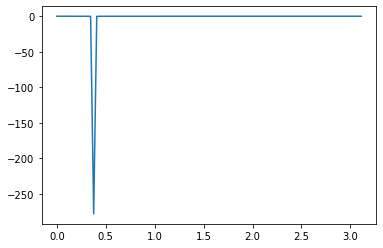

In [ ]:
d = scipy.signal.dlti(b, a)
w, mag, phase = d.bode()
plt.plot(w, mag)

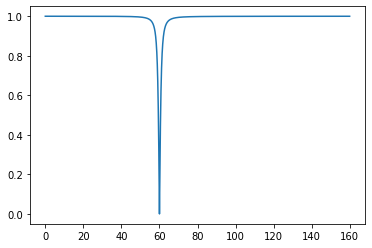

In [ ]:
w, amp = d.freqresp()
w=w[0:3200]
amp=amp[0:3200]
plt.plot(w/2/np.pi*1000, np.abs(amp))

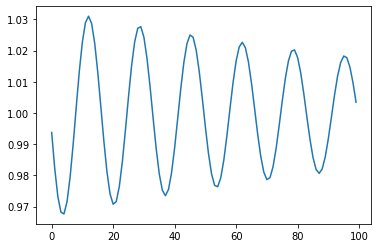

In [ ]:
t, y = d.impulse()
plt.plot(t, y[0])

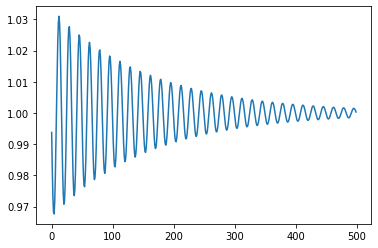

In [ ]:
t, y = d.step(n=500)
plt.plot(t, y[0])

zeros 1.00000 60.0000Hz
poles 0.99374 59.9921Hz
[0.92977649+0.36812455j 0.92977649-0.36812455j]
[0.92397093+0.36577268j 0.92397093-0.36577268j]


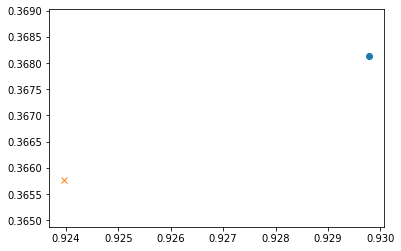

In [ ]:
print('zeros %.5f %.4fHz' % (np.abs(d.zeros[0]), np.angle(d.zeros[0]) * 1000 / (2*np.pi)))
print('poles %.5f %.4fHz' % (np.abs(d.poles[0]), np.angle(d.poles[0]) * 1000 / (2*np.pi)))
print(d.zeros)
print(d.poles)
plt.plot(np.real(d.zeros[0]), np.imag(d.zeros[0]), 'o')

w = np.linspace(0, 2*np.pi)
#plt.plot(np.cos(w), np.sin(w))
limits = plt.axis("equal")
plt.plot(np.real(d.poles[0]), np.imag(d.poles[0]), 'x')

# Lab4: Advanced

https://en.wikipedia.org/wiki/Audio_time_stretching_and_pitch_scaling

## Heartbeat rate from camera